In [275]:
"""
    Author : Tyronne Wickramarathne
    Date   : 03-11-2021
    Description : This application illustrates the driver demographic in a line chart. This is a Demo application to test IntelliJ's Dataspell IDE.
                  The dataset has been obtained from the official QLD Government website.
    E mail :
"""
import pandas as pd
import numpy as np
import warnings
from tabulate import tabulate
warnings.filterwarnings('ignore')

In [290]:
data = pd.read_csv("~/nfs/data-science/data/owid-covid-data.csv",low_memory=False)
data.head().transpose()


,0,1,2,3,4
iso_code,AFG,AFG,AFG,AFG,AFG
continent,Asia,Asia,Asia,Asia,Asia
location,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan
date,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28
total_cases,5.0,5.0,5.0,5.0,5.0
...,...,...,...,...,...
human_development_index,0.511,0.511,0.511,0.511,0.511
excess_mortality_cumulative_absolute,NaN,NaN,NaN,NaN,NaN
excess_mortality_cumulative,NaN,NaN,NaN,NaN,NaN
excess_mortality,NaN,NaN,NaN,NaN,NaN


In [292]:
data.describe()
df = data
df = df.rename(columns={'location':'Country','human_development_index':'HDI','new_tests_per_thousand':'New tests per thousand','new_cases_per_million':'New cases per million','new_deaths_per_million':'New deaths per million','total_vaccinations_per_hundred':'Total vaccinated %'})



In [293]:
df_temp = df[['Country','HDI','continent','New tests per thousand','New cases per million','New deaths per million','Total vaccinated %']]

df_temp.describe()

,HDI,New tests per thousand,New cases per million,New deaths per million,Total vaccinated %
count,112670.000000,54371.000000,119931.000000,109116.000000,30860.000000
mean,0.726253,2.510836,85.638455,1.585059,49.451801
std,0.150056,6.604001,197.838631,4.135981,48.879670
min,0.394000,0.000000,-3125.829000,-75.911000,0.000000
25%,0.602000,0.186000,0.292000,0.000000,6.140000
50%,0.744000,0.750000,10.971000,0.156000,32.675000
75%,0.845000,2.313000,83.468000,1.379250,84.590000
max,0.957000,325.760000,8620.690000,203.513000,264.370000


In [294]:
df_temp = df_temp.groupby(['Country']).mean().reindex()

df_temp = df_temp.dropna()
#df_temp = df_temp.sort_values(by=['new_tests_per_thousand'])
df_temp = df_temp.sort_values(by=['HDI','New deaths per million'],ascending=False)

top_ten_hdi = df_temp.head(10)
low_ten_hdi = df_temp.tail(10)

srl = df_temp.loc['Sri Lanka']

In [295]:
df_temp = df_temp.sort_values(by=['HDI','New deaths per million'],ascending=True)
df_temp.head(50)

,HDI,New tests per thousand,New cases per million,New deaths per million,Total vaccinated %
Country,,,,,
South Sudan,0.433,0.059309,1.888819,0.021865,0.505333
Mozambique,0.456,0.051328,7.986251,0.114240,4.659130
Democratic Republic of Congo,0.480,0.006796,1.036880,0.020022,0.085357
Malawi,0.483,0.019751,5.441554,0.204426,3.126234
Ethiopia,0.485,0.053989,5.180395,0.095212,2.069294
Senegal,0.512,0.081782,7.058166,0.188547,3.001212
Togo,0.515,0.107508,5.084298,0.048897,6.758889
Madagascar,0.528,0.021652,2.596677,0.063537,0.520625
Cote d'Ivoire,0.538,0.070437,3.776283,0.044182,3.083641


In [296]:
top_ten_hdi.head(10)

,HDI,New tests per thousand,New cases per million,New deaths per million,Total vaccinated %
Country,,,,,
Norway,0.957,2.555758,61.765936,0.275863,56.892523
Ireland,0.955,2.738372,146.357697,1.818205,67.888218
Switzerland,0.955,2.454206,162.789815,2.130506,58.458650
Iceland,0.949,3.235177,64.205926,0.162885,72.504673
Sweden,0.945,2.664642,180.445228,2.460581,68.511667
Australia,0.944,2.497118,10.342459,0.110831,43.139841
Denmark,0.940,11.857047,109.645325,0.782539,64.192921
Finland,0.938,2.209776,44.224840,0.353698,63.982088
United Kingdom,0.932,7.609856,208.474450,3.418250,88.056905


In [300]:
top_ten_hdi = top_ten_hdi.append(srl)

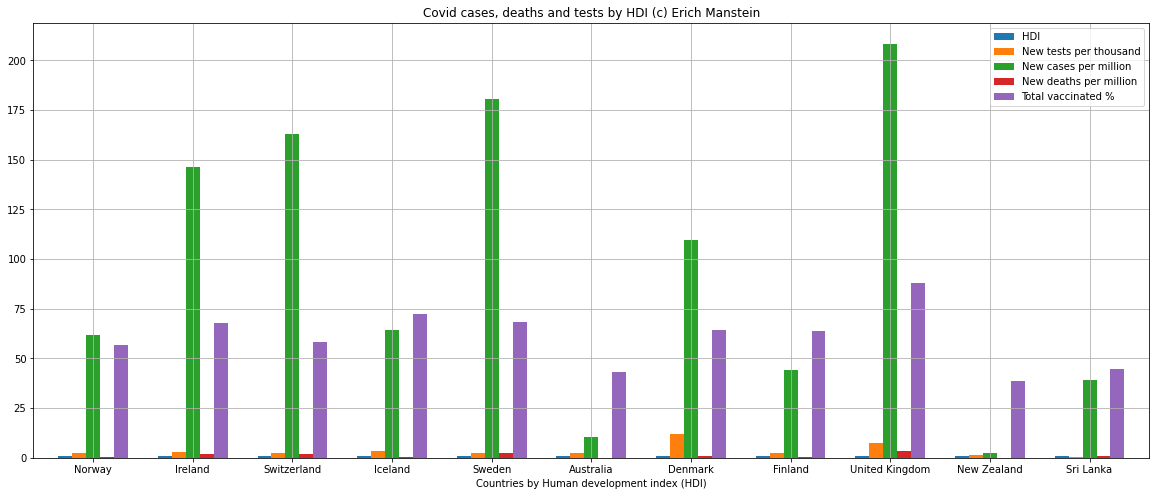

In [301]:
#df.rename(columns={"A": "a", "B": "c"})
ignore = top_ten_hdi.plot.bar(width=0.7, rot=0, xlabel='Countries by Human development index (HDI)', figsize=(20,8), title='Covid cases, deaths and tests by HDI (c) Erich Manstein', grid=True)


In [285]:
top_ten_hdi.head(12)
#print(top_ten_hdi)brisbane

,HDI,New tests per thousand,New cases per million,New deaths per million,Total vaccinated %
Country,,,,,
Norway,0.957,2.555758,61.765936,0.275863,56.892523
Ireland,0.955,2.738372,146.357697,1.818205,67.888218
Switzerland,0.955,2.454206,162.789815,2.130506,58.458650
Iceland,0.949,3.235177,64.205926,0.162885,72.504673
Sweden,0.945,2.664642,180.445228,2.460581,68.511667
Australia,0.944,2.497118,10.342459,0.110831,43.139841
Denmark,0.940,11.857047,109.645325,0.782539,64.192921
Finland,0.938,2.209776,44.224840,0.353698,63.982088
United Kingdom,0.932,7.609856,208.474450,3.418250,88.056905


In [286]:
top_ten_hdi

,HDI,New tests per thousand,New cases per million,New deaths per million,Total vaccinated %
Country,,,,,
Norway,0.957,2.555758,61.765936,0.275863,56.892523
Ireland,0.955,2.738372,146.357697,1.818205,67.888218
Switzerland,0.955,2.454206,162.789815,2.130506,58.458650
Iceland,0.949,3.235177,64.205926,0.162885,72.504673
Sweden,0.945,2.664642,180.445228,2.460581,68.511667
Australia,0.944,2.497118,10.342459,0.110831,43.139841
Denmark,0.940,11.857047,109.645325,0.782539,64.192921
Finland,0.938,2.209776,44.224840,0.353698,63.982088
United Kingdom,0.932,7.609856,208.474450,3.418250,88.056905


In [287]:
print(tabulate(top_ten_hdi, tablefmt='fancy_grid'))

╒════════════════╤═══════╤═══════════╤══════════╤════════════╤═════════╕
│ Norway         │ 0.957 │  2.55576  │  61.7659 │ 0.275863   │ 56.8925 │
├────────────────┼───────┼───────────┼──────────┼────────────┼─────────┤
│ Ireland        │ 0.955 │  2.73837  │ 146.358  │ 1.81821    │ 67.8882 │
├────────────────┼───────┼───────────┼──────────┼────────────┼─────────┤
│ Switzerland    │ 0.955 │  2.45421  │ 162.79   │ 2.13051    │ 58.4586 │
├────────────────┼───────┼───────────┼──────────┼────────────┼─────────┤
│ Iceland        │ 0.949 │  3.23518  │  64.2059 │ 0.162885   │ 72.5047 │
├────────────────┼───────┼───────────┼──────────┼────────────┼─────────┤
│ Sweden         │ 0.945 │  2.66464  │ 180.445  │ 2.46058    │ 68.5117 │
├────────────────┼───────┼───────────┼──────────┼────────────┼─────────┤
│ Australia      │ 0.944 │  2.49712  │  10.3425 │ 0.110831   │ 43.1398 │
├────────────────┼───────┼───────────┼──────────┼────────────┼─────────┤
│ Denmark        │ 0.94  │ 11.857    │ 109.645  │ 0

In [303]:
low_ten_hdi.head(10)

,HDI,New tests per thousand,New cases per million,New deaths per million,Total vaccinated %
Country,,,,,
Nigeria,0.539,0.020506,1.638319,0.023287,1.258026
Cote d'Ivoire,0.538,0.070437,3.776283,0.044182,3.083641
Madagascar,0.528,0.021652,2.596677,0.063537,0.520625
Togo,0.515,0.107508,5.084298,0.048897,6.758889
Senegal,0.512,0.081782,7.058166,0.188547,3.001212
Ethiopia,0.485,0.053989,5.180395,0.095212,2.069294
Malawi,0.483,0.019751,5.441554,0.204426,3.126234
Democratic Republic of Congo,0.480,0.006796,1.036880,0.020022,0.085357
Mozambique,0.456,0.051328,7.986251,0.114240,4.659130


In [304]:
top_twenty = top_ten_hdi.append(low_ten_hdi)
top_twenty.head(25)

,HDI,New tests per thousand,New cases per million,New deaths per million,Total vaccinated %
Country,,,,,
Norway,0.957,2.555758,61.765936,0.275863,56.892523
Ireland,0.955,2.738372,146.357697,1.818205,67.888218
Switzerland,0.955,2.454206,162.789815,2.130506,58.458650
Iceland,0.949,3.235177,64.205926,0.162885,72.504673
Sweden,0.945,2.664642,180.445228,2.460581,68.511667
Australia,0.944,2.497118,10.342459,0.110831,43.139841
Denmark,0.940,11.857047,109.645325,0.782539,64.192921
Finland,0.938,2.209776,44.224840,0.353698,63.982088
United Kingdom,0.932,7.609856,208.474450,3.418250,88.056905
